In [10]:
import config


In [11]:
config.prompt

'Seven plus two is equal to'

In [12]:
directory = config.prompt + '/2022-12-01 05:57:48.121010'

In [13]:
def get_model(directory):
    import torch
    model = torch.load(directory)
    return model

In [14]:
def get_mean_attention(model, hidden_number, token_number):
    return model[3][hidden_number].mean(dim=0).mean(dim=0).cpu().numpy()[token_number]

In [27]:
model = get_model(directory + '/' + 'base_model.pt')

In [31]:
len(model[3])

48

In [55]:
def compare_hidden_states(a, b):
    if(a.shape != b.shape):
        print("hidden state size not equal")
        return NULL
    diff = b - a
    return diff
def Average(lst):
    return sum(lst) / len(lst)


In [56]:
def plot_array(array,prompt, title):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    np.random.seed(0)
    sns.set()
    # uniform_data = np.random.rand(10, 12)
    ax = sns.heatmap(array)
    plt.xlabel('hidden States')
    plt.ylabel(prompt)
    plt.title(title)
    plt.show() 

In [64]:
def plot_diff_array(prompt, token_changed):
    base_model_directory = directory + '/' + 'base_model.pt'
    model_directory = directory + '/best_model' + str(token_changed) + '.pt'
    hidden_diff = []
    
    base_model = get_model(base_model_directory)
    model = get_model(model_directory)
    for j in range(6):
        temp = []
        for i in range(48):
            base_state = get_mean_attention(base_model, i,j)
            state = get_mean_attention(model, i, j)
            diff = compare_hidden_states(base_state, state)
            mean_diff = Average(diff)
            # print(mean_diff)
            # print(mean_diff)
            temp.append(mean_diff)
        hidden_diff.append(temp)
    plot_array(hidden_diff,prompt,
               "Comparision of original model and model with " + str(token_changed) +  "th token restored" )
    # return hidden_diff
    
    
    

In [65]:
def diff_list(a, b):
    diff = []
    for i in range(len(a)):
        temp = []
        for j in range(len(a[0])):
            temp.append(b[i][j] - a[i][j])
        diff.append(temp)
    plot_array(diff, config.prompt, "")
    return diff
            

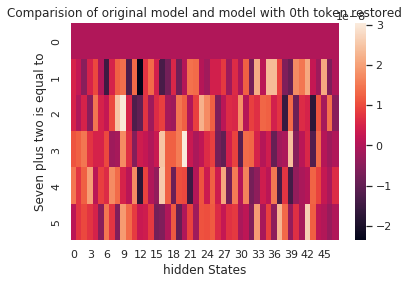

In [66]:
plot_diff_array(config.prompt, 0)

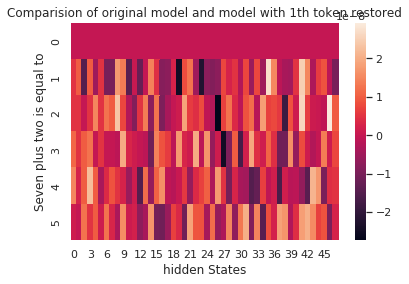

In [67]:
plot_diff_array(config.prompt, 1)

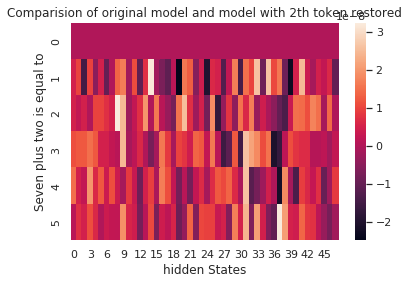

In [68]:
plot_diff_array(config.prompt, 2)

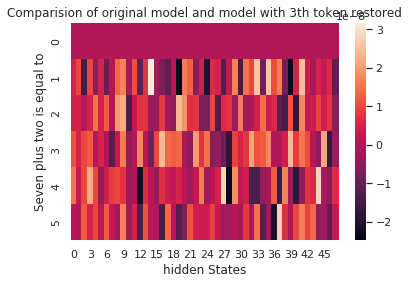

In [69]:
plot_diff_array(config.prompt, 3)

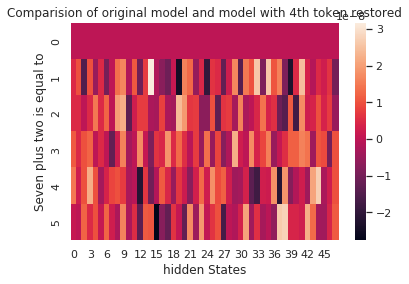

In [70]:
plot_diff_array(config.prompt, 4)

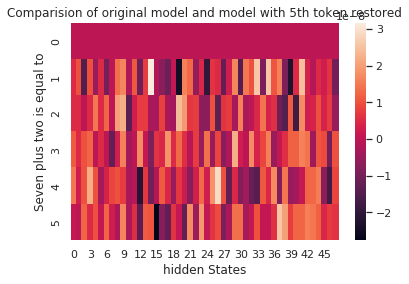

In [71]:
plot_diff_array(config.prompt, 5)

In [72]:
plot_diff_array(config.prompt, 6)

FileNotFoundError: [Errno 2] No such file or directory: 'Seven plus two is equal to/2022-12-01 05:57:48.121010/best_model6.pt'

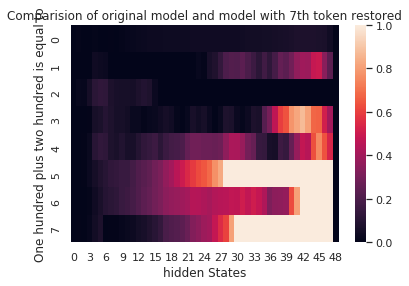

In [19]:
plot_diff_array(config.prompt, 7)

In [20]:
plot_diff_array(config.prompt, 8)

FileNotFoundError: [Errno 2] No such file or directory: 'One hundred plus two hundred is equal to/2022-11-30 20:35:05.932110/best_model8.pt'

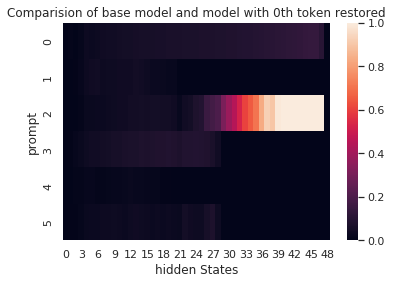

In [167]:
plot_array(hidden_diff, "Comparision of base model and model with 0th token restored")

In [80]:
def plot_mean_lastHiddenState(number, directory):
    import torch
    model = torch.load(directory + '/best_model' + number + '.pt')
    mean_hidden_state = model[2][-1].mean(dim=0).cpu().numpy()
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    np.random.seed(0)
    sns.set()
    # uniform_data = np.random.rand(10, 12)
    ax = sns.heatmap(mean_hidden_state, vmin=0, vmax=1)
    plt.show()

    

In [99]:
model = get_model('0', 'Seven plus two is equal to')

In [103]:
base_model = torch.load("Seven plus two is equal to/base_model.pt")

In [105]:
len(base_model[2])

49

In [94]:
hidden0 = get_mean_attention(model, 0

49

There are 49 hidden states in the model, each hidden state is of size batch_size, sequence_length, length

In [118]:
hidden_state = model[2][1]

In [119]:
hidden_state.shape

torch.Size([2, 6, 1600])

In [124]:
hidden_state.mean(dim=0).mean(dim=0).mean(dim=0)

tensor(-0.0167, device='cuda:0')

In [90]:
model[2][1].shape

torch.Size([2, 6, 1600])

In [84]:
column = model[2][0].mean(dim = 0)[0].cpu().numpy()

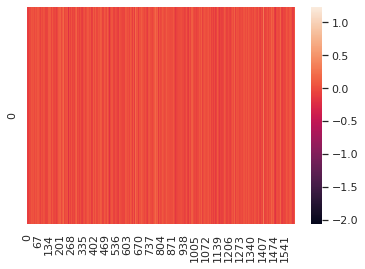

In [85]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap([column])

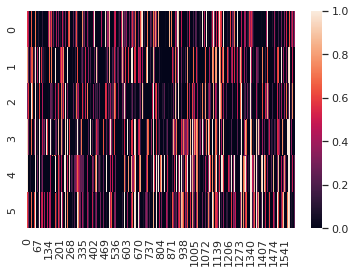

In [86]:
plot_mean_lastHiddenState('0', 'Seven plus two is equal to')

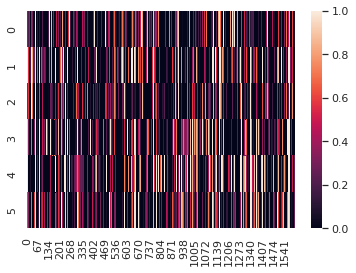

In [87]:
plot_mean_lastHiddenState('1', 'Seven plus two is equal to')

In [5]:
import torch
model = torch.load('Seven plus two is equal to/best_model0.pt')

In [6]:
# model = model.to_tuple()

In [7]:
type(model)

transformers.modeling_outputs.CausalLMOutputWithCrossAttentions

In [24]:
mean_hidden_state = model[2][-1].mean(dim=0).cpu().numpy()


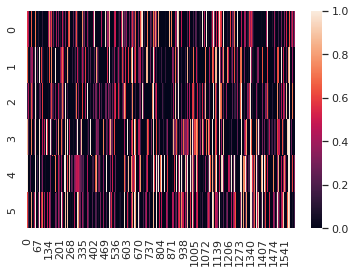

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()
# uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(mean_hidden_state, vmin=0, vmax=1)
plt.show()